# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa

from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as rms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().sum()


attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [10]:
tsi = pd.date_range(start ='1-1-2018 00:00:00', end ='1-05-2018 00:29:10',periods=len(sensor))

Assign the time series index to the dataframe's index.

In [13]:
sensor = sensor.set_index(tsi)
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00.000000000,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:03:18.485714285,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:06:36.971428571,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:09:55.457142857,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:13:13.942857142,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<Figure size 1440x1080 with 0 Axes>

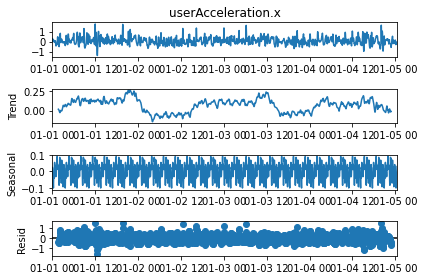

In [16]:
plt.figure(figsize = (20,15))
decomposed = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period = 60)
decomposed.plot()
plt.show()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<Figure size 1440x1080 with 0 Axes>

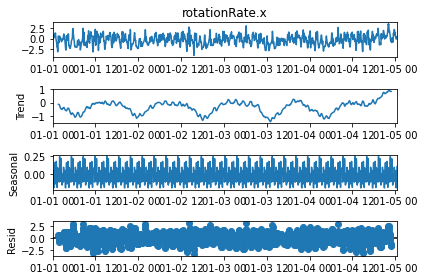

In [17]:
plt.figure(figsize = (20,15))
decomposed2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period = 60)
decomposed2.plot()
plt.show()


Let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

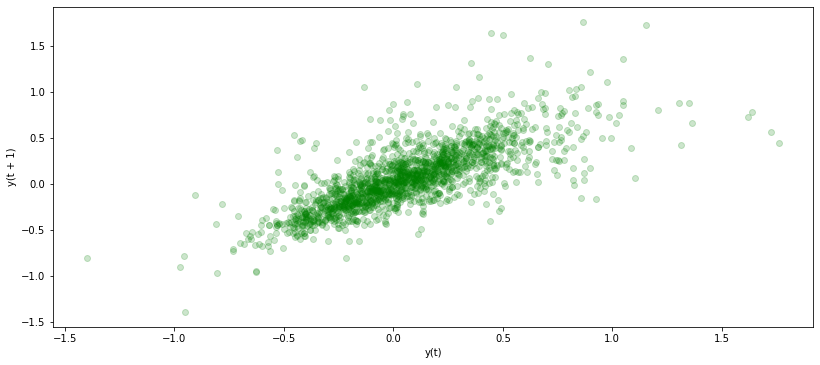

In [26]:
plt.figure(figsize = (30,20))
plt.subplot(321)
lag_plot(sensor["userAcceleration.x"],c = "green", alpha=0.2)


Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

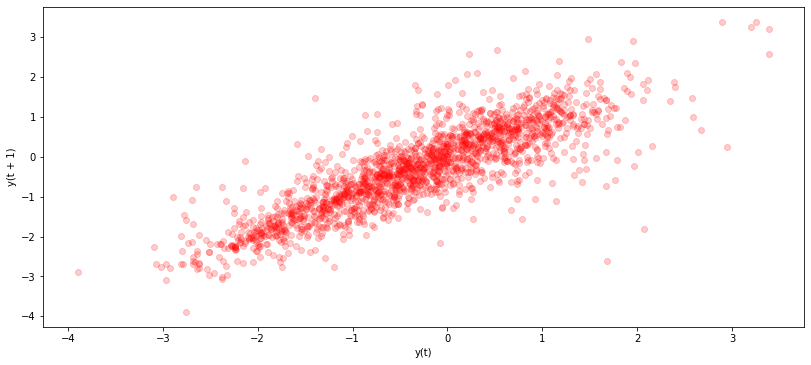

In [25]:
plt.figure(figsize = (30,20))
plt.subplot(322)
lag_plot(sensor["rotationRate.x"], c = "red", alpha=0.2)


What are your conclusions from both visualizations?

The lagplot in this case helps us to understand if there is a positive correlation (ascending diagonal from left to right) between our variables and the corresponding time variable. We can deduce that there is some correlation in both cases although not all the data line up forming a perfect diagonal. In the second plot we can see that the correlation seems to be higher since the dispersion is not so great. 

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [23]:
res = adfuller(sensor["userAcceleration.x"])
res


(-17.957994086169762,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [24]:
res2 = adfuller(sensor["rotationRate.x"])
res2

(-5.2698606250864355,
 6.320230335911768e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

* userAcceleration.x

If our adf was < "-3.434100824760071", we can reject that the series is not stationary and there is a statistical significant trend being 99% sure, if it was bigger but still smaller than "-2.863196780129223", we will be 95% sure; finally, if it was greater than "-2.5676520210882936", we will be 90% sure.

* rotationRate.x

If our adf was < "-3.4341465551936534", we can reject that the series is not stationary and there is a statistical significant trend being 99% sure, if it was bigger but still smaller than "-2.863216966926812", we will be 95% sure; finally, if it was greater than "-2.567662770090317", we will be 90% sure.
